In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
#fixed accoridng to trust conveyance
costs = 37.5
#cost adjustment factor, cumulative cpi since 1989
caf = 2.5
#taxes using 2023 average
tax = 2.9
#daily production of barrels subject to royalty interest, using 2023 number from 10-k
prod = 650000
#royalty interest
royalty_pct = .164
#WTI futures quotes
nov = 69.34
dec = 68.84
jan = 68.44
#trading days until the BPT "call option" expires.
n_days = 73
#amount needed to earn in next n_days for the royalty to not terminate
nec_royalty = 20000000


In [60]:
#breakeven WTI price for BPT to expire itm (i.e. not terminate)
breakeven = ((nec_royalty/n_days)/(royalty_pct*prod))+(tax+(costs*caf))

In [61]:
df = pd.read_csv("wti_historical.csv")

In [62]:
df["pct_change"] = df["Price"].pct_change()
df["std_returns"] = df["pct_change"].rolling(20).std()

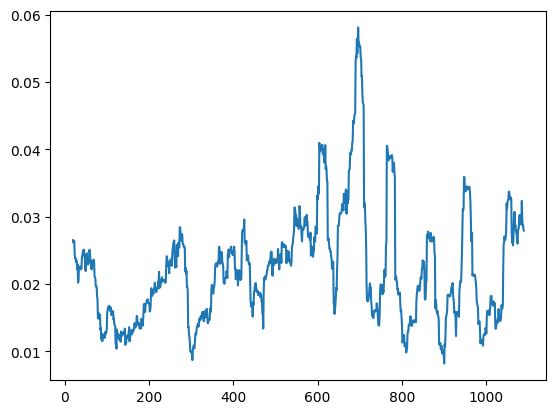

In [63]:
plt.plot(df["std_returns"])

I dont really know anything, but god damn does this vol look clustered. Very Garchable. We are not predicting vol though, so we will not use this.

(array([  3.,   0.,   2.,   2.,   1.,   4.,   7.,   6.,  14.,  14.,  19.,
         36.,  56.,  63.,  73., 101.,  91.,  86.,  96.,  77.,  60.,  59.,
         45.,  46.,  25.,  22.,  22.,  13.,  12.,   7.,   4.,   6.,   4.,
          4.,   0.,   4.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([-0.07818317, -0.07385962, -0.06953607, -0.06521251, -0.06088896,
        -0.05656541, -0.05224185, -0.0479183 , -0.04359475, -0.03927119,
        -0.03494764, -0.03062409, -0.02630054, -0.02197698, -0.01765343,
        -0.01332988, -0.00900632, -0.00468277, -0.00035922,  0.00396434,
         0.00828789,  0.01261144,  0.01693499,  0.02125855,  0.0255821 ,
         0.02990565,  0.03422921,  0.03855276,  0.04287631,  0.04719987,
         0.05152342,  0.05584697,  0.06017053,  0.06449408,  0.06881763,
         0.07314118,  0.07746474,  0.08178829,  0.08611184,  0.0904354 ,
         0.09475895,  0.0990825 ,  0.10340606,  0.10772961,  0.11205316,
 

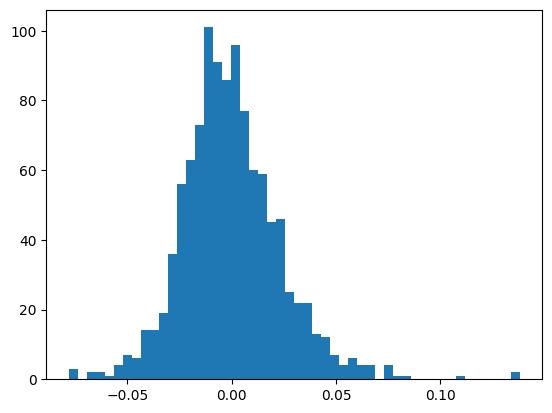

In [64]:
plt.hist(df["pct_change"], bins=50)

yeah, thats normal, and if you dont think so, I don't care.

going to diff prices instead of taking pct change cuz I would have to log returns and there might be really small values (massively negative logs) that I dont want to deal with.

In [73]:
df["diffed"] = df["Price"].diff(1)
std = df["diffed"].std()
z = ((breakeven - nov))/(std*n_days**.5)

I realize I cannot just find z score of reaching breakeven price, but the probability that WTI is at or above breakeven for long enough such that net revenues are above 2 million. Thus, we need to find a new breakeven end price, one that ensures that over a 73 day period of linear increase, the mean WTI price is high enough such that BPT hits 2 million royalty. We can see that this would give a z score that is extremely high.

breakeven_daily *daily = (end - now)/n_days

In [76]:
new_breakeven = nov + breakeven


In [79]:
new_z = (new_breakeven-nov)/(std*n_days**.5)
print(new_z)

5.987452202151926


under conditions when normality is a fair assumption, this breakeven is impossible. Requires a black swan event in the next two months for such a WTI mean price to happen.